In [13]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from unyt import boltzmann_constant_cgs, hydrogen_mass_cgs
parsec_in_cm = 3.086e18
gamma = 5./3.

In [14]:
tstart=116
tend=136

ts = []
for timestep in range(tstart, tend):
    timestep_str = f"{timestep:05d}"
    z_kpc, heatEdot_cgs = np.loadtxt("csv/turbHeat_avg" + timestep_str + ".csv", unpack=True)
    z_kpc, coolEdot_cgs = np.loadtxt("csv/coolEdot_avg" + timestep_str + ".csv", unpack=True)
    z_kpc, heatFlux_cgs = np.loadtxt("csv/heatFlux_avg" + timestep_str + ".csv", unpack=True)
    z_kpc, massFlux_cgs = np.loadtxt("csv/massFlux_avg" + timestep_str + ".csv", unpack=True)
    z_kpc, T_avg = np.loadtxt("csv/T_avg" + timestep_str + ".csv", unpack=True)

    c_v = (1 /(gamma - 1.)) * boltzmann_constant_cgs
    convFlux = c_v * (heatFlux_cgs - massFlux_cgs * T_avg)
    ts.append((z_kpc, heatEdot_cgs, coolEdot_cgs, convFlux))

z_kpc = ts[0][0]
heatEdot_arr = np.zeros((len(ts[0][1]), len(ts)))
coolEdot_arr = np.zeros((len(ts[0][2]), len(ts)))
convFlux_arr = np.zeros((len(ts[0][3]), len(ts)))
for i in range(len(ts)):
    heatEdot_arr[:, i] = ts[i][1]
    coolEdot_arr[:, i] = ts[i][2]
    convFlux_arr[:, i] = ts[i][3]

heatEdot = np.mean(heatEdot_arr, axis=1)
coolEdot = np.mean(coolEdot_arr, axis=1)
convFlux = np.mean(convFlux_arr, axis=1)

z_kpc_cgs = z_kpc * (1.0e3 * parsec_in_cm)
z_kpc_diff = z_kpc[:-1] + 0.5 * np.diff(z_kpc)
divF = -scipy.signal.savgol_filter(convFlux, 3, 1, 1, delta=np.diff(z_kpc_cgs)[0])

(2.0, 100)

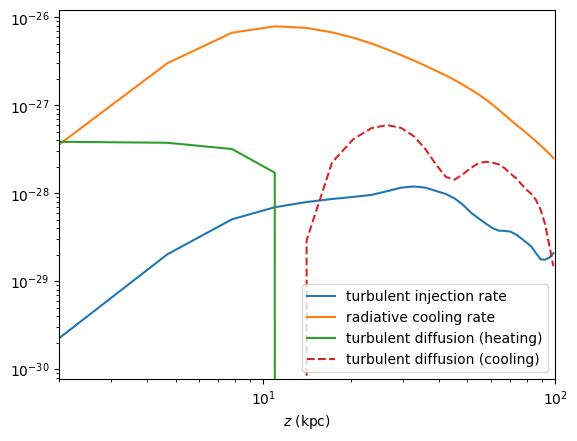

In [15]:
plt.plot(z_kpc, heatEdot, label="turbulent injection rate")
plt.plot(z_kpc, -coolEdot, label="radiative cooling rate")
plt.plot(z_kpc, divF, label="turbulent diffusion (heating)")
plt.plot(z_kpc, -divF, '--', label="turbulent diffusion (cooling)")
plt.legend(loc='lower right')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r"$z$ (kpc)")
plt.xlim(2., 100)

(0.001, 20)

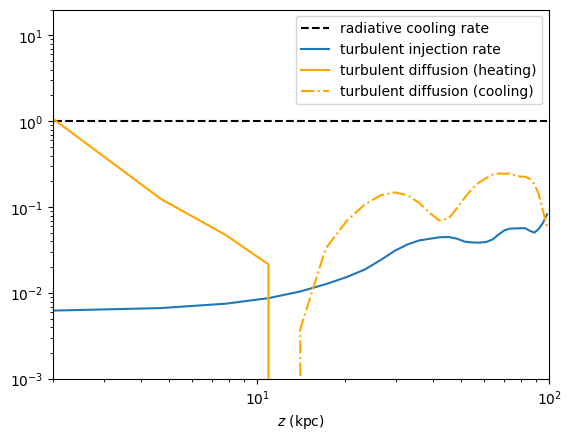

In [16]:
plt.plot(z_kpc, np.ones_like(coolEdot), '--', color='black', label="radiative cooling rate")
plt.plot(z_kpc, heatEdot/ (-coolEdot), label="turbulent injection rate")
plt.plot(z_kpc, divF / (-coolEdot), color='orange', label="turbulent diffusion (heating)")
plt.plot(z_kpc, -divF / (-coolEdot), '-.', color='orange', label="turbulent diffusion (cooling)")
plt.legend(loc='upper right')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r"$z$ (kpc)")
plt.xlim(2, 100)
plt.ylim(1e-3, 20)